In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
results = pd.read_csv("results/eval_mmlu-13b_chat-mcq2oe.csv")

In [3]:
dname_map = {d: idx + 1 for idx, d in enumerate(results.category.unique())}

plt_results = results[results.split == "test"]
plt_results["task_idx"] = results.category.apply(lambda d: dname_map[d])
plt_results["ece_100"] = results["ece"] * 100.
plt_results["acc_100"] = results["acc"] * 100.
plt_results = plt_results.sort_values("task_idx")
plt_results

/tmp/ipykernel_705346/2880018623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["task_idx"] = results.category.apply(lambda d: dname_map[d])
/tmp/ipykernel_705346/2880018623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["ece_100"] = results["ece"] * 100.
/tmp/ipykernel_705346/2880018623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,method,category,split,acc,ece,task_idx,ece_100,acc_100
0,raw_13b_chat,mmlu:high_school_biology,test,0.432258,0.354477,1,35.447731,43.225807
114,ut_13b_chat,mmlu:high_school_biology,test,0.467742,0.138630,1,13.863007,46.774194
116,ut_13b_chat,mmlu:human_aging,test,0.439462,0.144463,2,14.446338,43.946192
2,raw_13b_chat,mmlu:human_aging,test,0.417040,0.308306,2,30.830640,41.704038
118,ut_13b_chat,mmlu:formal_logic,test,0.484127,0.091994,3,9.199395,48.412701
...,...,...,...,...,...,...,...,...
222,ut_13b_chat,mmlu:medical_genetics,test,0.450000,0.137771,55,13.777095,44.999999
224,ut_13b_chat,mmlu:marketing,test,0.551282,0.026403,56,2.640265,55.128211
110,raw_13b_chat,mmlu:marketing,test,0.529915,0.193453,56,19.345316,52.991456
112,raw_13b_chat,mmlu:professional_law,test,0.443286,0.297317,57,29.731704,44.328552


/tmp/ipykernel_705346/3016012985.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(labels)
/tmp/ipykernel_705346/3016012985.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels(labels)


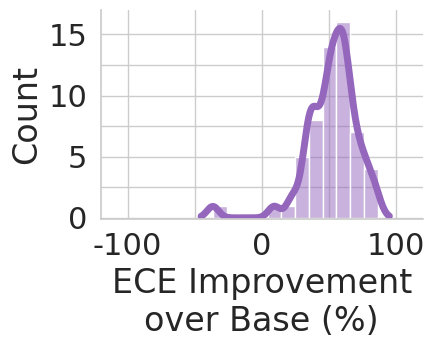

In [23]:
sns.set_theme(font_scale=2., style="whitegrid")

ref = plt_results[plt_results.method == "raw_13b_chat"]["ece_100"].values
new = plt_results[plt_results.method == "ut_13b_chat"]["ece_100"].values

g = sns.displot(
    pd.DataFrame({ "rel_imp": -((new - ref) / ref) * 100. }),
    # kind="kde", fill=True, bw_adjust=.5,
    kde=True, stat="count", kde_kws={"bw_adjust": .5, "cut": 2}, binwidth=10,
    height=4, aspect=11/9, 
    legend=False,
    palette=sns.color_palette("tab20")[8:9]
)

g.ax.get_lines()[0].set(linewidth=5)

import matplotlib.ticker as ticker
g.ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
g.ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))

g.ax.set_ylim(-0.1, 17)
g.ax.set_xlim(-120, 120)

labels= [f"{int(x)}" for x in g.ax.get_xticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
g.ax.set_xticklabels(labels)

labels= [f"{int(x)}" for x in g.ax.get_yticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
labels[6] = ""
g.ax.set_yticklabels(labels)

g.set(xlabel="ECE Improvement\nover Base (%)")

g.fig.tight_layout()
g.fig.show()
g.fig.savefig("mmlu_rel_imp_qa_oe.pdf", bbox_inches="tight")

In [5]:
sns.set_theme(font_scale=6., style="whitegrid")

fig, ax = plt.subplots(figsize=(200, 40))

ax = sns.barplot(ax=ax, data=plt_results,
                 x="task_idx", y="ece_100", hue="method",
                 width=0.68,
                 hue_order=["ut_13b_chat", "raw_13b_chat"],
                 palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel(r'$\mathrm{ECE} (\%)$', fontsize=250, labelpad=100)
# ax.set_yticks(np.arange(0, 60 + 1e-3, 10))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
label_map = { "raw_13b_chat": "Base", "ut_13b_chat": "UT" }
labels = [label_map[l] for l in labels]

ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180))#, bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_oe_ece_comparison.pdf", bbox_inches="tight")

/tmp/ipykernel_1399796/3707364196.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)
/tmp/ipykernel_1399796/3707364196.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)


In [6]:
sns.set_theme(font_scale=6., style="whitegrid")

fig, ax = plt.subplots(figsize=(200, 40))

ax = sns.barplot(ax=ax, data=plt_results,
                 x="task_idx", y="acc_100", hue="method",
                 width=0.68,
                 hue_order=["ut_13b_chat", "raw_13b_chat"],
                 palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel('Query Acc. (%)', fontsize=250, labelpad=100)
ax.set_yticks(np.arange(0, 100 + 1e-3, 20))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
label_map = { "raw_13b_chat": "Base", "ut_13b_chat": "UT" }
labels = [label_map[l] for l in labels]

ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180))#, bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_oe_qacc_comparison.pdf", bbox_inches="tight")

/tmp/ipykernel_1399796/778188259.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)
